In [1]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt

In [2]:
def matrixGenerator(n):
    matrix=[[rn.random()*2-1 for i in range(n)] for j in range(n)] 
    return matrix

In [3]:
def gaussianElimination(matrix):
    n=len(matrix)
    for i in range (n):
        maxIndex=i
        pivot=np.absolute(matrix[i][i])
        for j in range(i+1,n):
            if(np.absolute(matrix[j][i])>pivot):
                pivot=np.absolute(matrix[j][i])
                maxIndex=j
        for j in range (i,n):
            temp=matrix[i][j]
            matrix[i][j]=matrix[maxIndex][j]
            matrix[maxIndex][j]=temp
        for j in range(i+1,n):
            if(matrix[i][i]!=0):
                value=matrix[j][i]/matrix[i][i]
                for k in range(n):
                    matrix[j][k]=matrix[j][k]-(matrix[i][k]*value)
    for i in range (n):
        for j in range(i):
            matrix[i][j]=0

In [4]:
def growthFactor(matrix):
    n=len(matrix)
    max1=0
    for i in range (n):
        for j in range(n):
            max1=np.maximum(max1,np.absolute(matrix[i][j]))
    gaussianElimination(matrix)
    max2=0
    for i in range (n):
        for j in range(n):
            max2=np.maximum(max2,np.absolute(matrix[i][j]))
    return max2/max1

We can test the previous methods this many times with the following algotihm which will generate a matrix of any wanted size, print it, apply gaussian elimination to it (inside the growth factor method) print the growth factor and the modfied matrix.

In [6]:
#Tester
n=5
matrix=matrixGenerator(n)
for i in range(n):
    print('[',end='')
    for j in range(n):
        print(matrix[i][j],end='\t')
    print(']')
print(growthFactor(matrix))
for i in range(n):
    print('[',end='')
    for j in range(n):
        print(matrix[i][j],end='\t')
    print(']')


[-0.7781902984096318	-0.0338891858629744	0.0051052867418726056	0.955802826495594	0.18122680977816774	]
[0.9317634317349943	-0.6954685225647814	-0.5417729784941296	0.5219284543717821	0.9255181640636732	]
[0.7724975105784924	0.33012038123069676	-0.6337549177202049	0.6205400055419443	0.42625413333121	]
[-0.9278787456725301	0.7396422285247732	-0.13199602373548913	-0.6661071166412167	0.6845831314064372	]
[-0.6658910981612449	0.5761000834190007	0.5357626366641723	-0.023342790534512492	-0.36887274596429553	]
1.73055357695
[0.9317634317349943	-0.6954685225647814	-0.5417729784941296	0.5219284543717821	0.9255181640636732	]
[0	0.9067127694580509	-0.18458696056384133	0.18782455656631425	-0.34106561048302064	]
[0	0	-0.6619271699442878	-0.15610584347058565	1.6239495359292917	]
[0	0	0	1.654068000255454	-0.6816309241844983	]
[0	0	0	0	0.8476566539742063	]


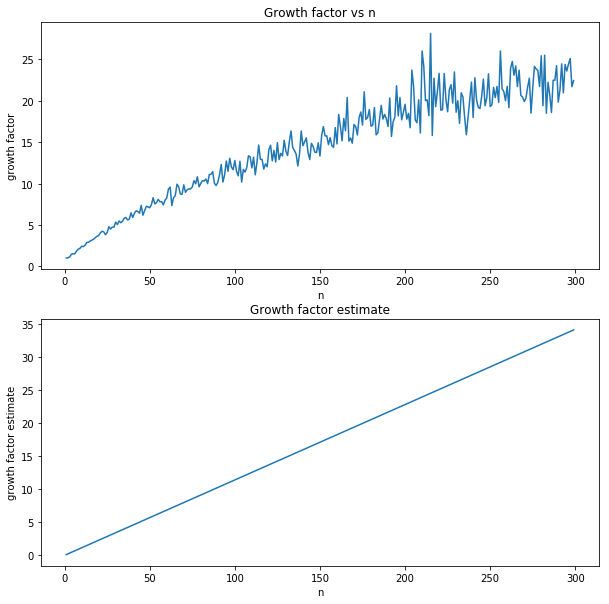

In [16]:
#growth factor vs n
growthList=[]
power=[]
maxN=300
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
for i in range(1,maxN):
    currentGrowth=0
    iterations=20
    if(i>50):
        iterations=10
    if(i>100):
        iterations=5
    if(i>200):
        iterations=2
    for j in range (iterations):
        currentGrowth=currentGrowth+(growthFactor(matrixGenerator(i))/iterations)
    growthList.append(currentGrowth)
    power.append(i/8.75)
ax1.plot(range(1,maxN),growthList)
ax1.set_title("Growth factor vs n")
ax1.set_xlabel('n')
ax1.set_ylabel('growth factor')
ax2.plot(range(1,maxN),power)
ax2.set_title("Growth factor estimate")
ax2.set_xlabel('n')
ax2.set_ylabel('growth factor estimate')

plt.show()

From these graphs, it seems we have a growth which is at most linear so 
we are able to estimate the growth factor with a polynomial, however, compared to an exponential function (our upper bound was $2^n$), a polynomial is much smaller. Thus, despite the worst case error being very large, the average error is much smaller it seems.

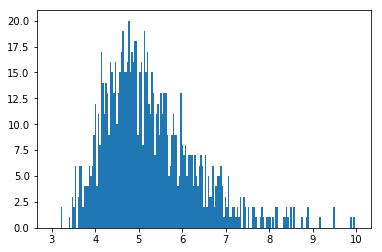

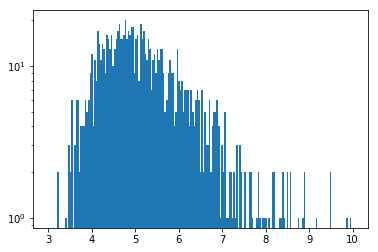

In [5]:
#growth factor for n=32, with a normal scale and with a logarithmic scale
n=32
values=[growthFactor(matrixGenerator(n)) for i in range(1000)]
plt.hist(values,bins=np.linspace(3,10,200))
plt.show()
plt.yscale('log', nonposy='clip')
plt.hist(values,bins=np.linspace(3,10,200))
plt.show()

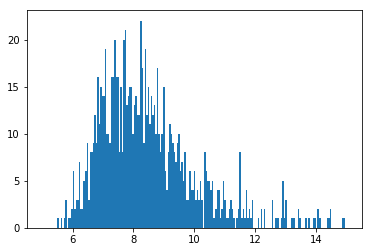

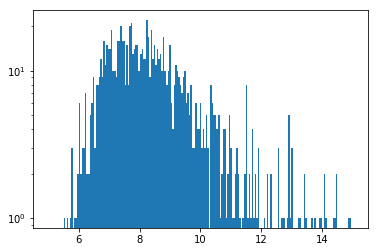

In [6]:
#growth factor for n=64, with a normal scale and with a logarithmic scale
n=64
values=[growthFactor(matrixGenerator(n)) for i in range(1000)]
plt.hist(values,bins=np.linspace(5,15,200))
plt.show()
plt.yscale('log', nonposy='clip')
plt.hist(values,bins=np.linspace(5,15,200))
plt.show()

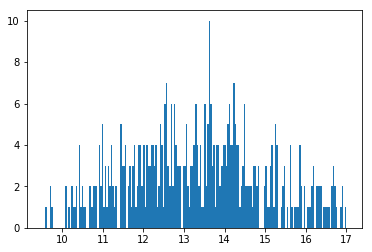

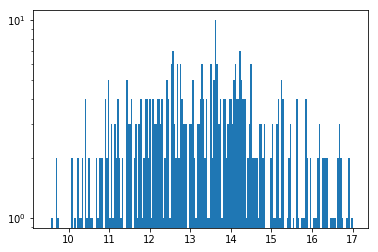

In [15]:
#growth factor for n=128, with a normal scale and with a logarithmic scale
n=128
values=[growthFactor(matrixGenerator(n)) for i in range(500)]
plt.hist(values,bins=np.linspace(9.5,23,200))
plt.show()
plt.yscale('log', nonposy='clip')
plt.hist(values,bins=np.linspace(9.5,23,200))
plt.show()

With the previous graphs, in those in a standard scaling for the y-axis we see that the pdf seems to be close to a normal distribution, so we can conjecture that the decay is exponential. 
Moreover, when we change the scale of the y axis to a logarithmic scale, we see that the decay is faster than a linear decay so this confirms our conjecture that the decay is at least exponential.

In [8]:
# For normal distribution:
def matrixGenerator2(n):
    matrix=[[rn.normalvariate(0,1)*2-1 for i in range(n)] for j in range(n)] 
    return matrix

With the next graphs, we see that the results will still hold when taking a normal distribution (Note that for this we took a standard gaussian with $\sigma=1$ and $\mu=0$.
That is, the curve for the growth factor with respect to n is close to linear and the decay of the pdf for a fixed n is almost exponential.

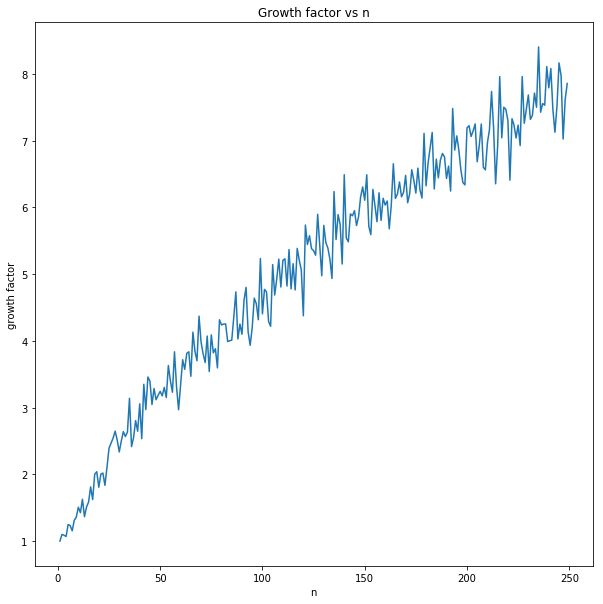

In [17]:
#growth factor vs n
growthList=[]
growthEstimationList=[]
for i in range(1,250):
    currentGrowth=0
    iterations=10
    for j in range (iterations):
        currentGrowth=currentGrowth+(growthFactor(matrixGenerator2(i))/iterations)
    growthList.append(currentGrowth)
    growthEstimationList.append(i/20)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.plot(range(1,250),growthList)
ax1.set_title("Growth factor vs n")
ax1.set_xlabel('n')
ax1.set_ylabel('growth factor')
plt.show()

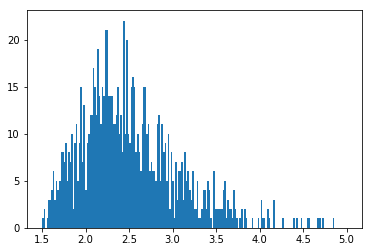

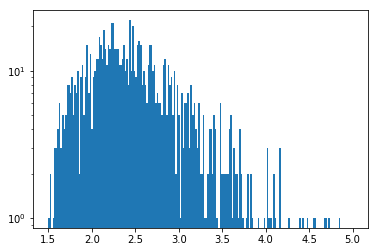

In [9]:
#growth factor for n=32, with a normal and with a logarithmic scale
n=32
values=[growthFactor(matrixGenerator2(n)) for i in range(1000)]
plt.hist(values,bins=np.linspace(1.5,5,200))
plt.show()
plt.yscale('log', nonposy='clip')
plt.hist(values,bins=np.linspace(1.5,5,200))
plt.show()

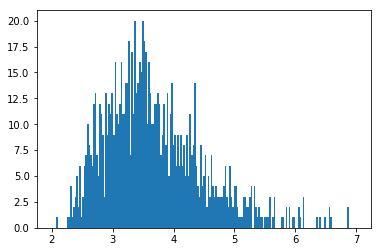

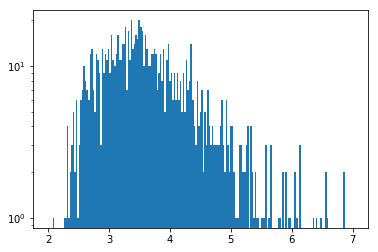

In [10]:
#growth factor for n=64, with a normal and with a logarithmic scale
n=64
values=[growthFactor(matrixGenerator2(n)) for i in range(1000)]
plt.hist(values,bins=np.linspace(2,7,200))
plt.show()
plt.yscale('log', nonposy='clip')
plt.hist(values,bins=np.linspace(2,7,200))
plt.show()

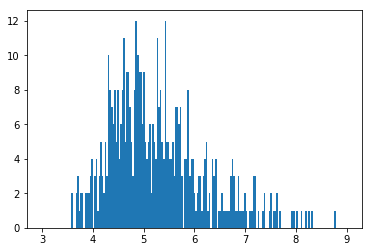

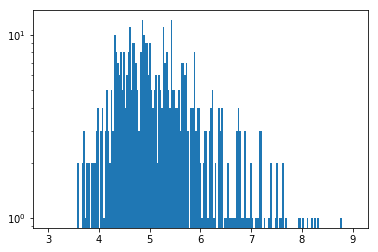

In [11]:
#growth factor for n=128, with a normal scale and with a logarithmic scale
n=128
values=[growthFactor(matrixGenerator2(n)) for i in range(500)]
plt.hist(values,bins=np.linspace(3,9,200))
plt.show()
plt.yscale('log', nonposy='clip')
plt.hist(values,bins=np.linspace(3,9,200))
plt.show()